### Description
This project will focus on understanding the demographics of students who participated in the GED training program. By examining key demographic factors, we hope to uncover patterns or trends that may influence participants' levels of commitment and engagement with the program. Understanding these patterns will allow us to identify which demographic groups benefited the most and pinpoint areas where outreach or support could be improved for future programs.

### Data Points
- Age
- Gender
- Socio-economic background
- Prior education levels
- Geographic location

### Methodology
- Collect demographic data through surveys and registration forms.
- Use statistical analysis techniques to segment participants by different demographic factors.
- Visualize the data using charts and graphs to highlight trends and disparities.

### Expected Outcomes
- **Insights into the demographic composition of participants**.
- **Insights into how different demographic groups vary in their commitment to and engagement with the program**.
- **Identification of underserved groups or gaps in participation that need attention**.
- **Data-driven recommendations** for tailoring future GED programs to better meet the needs of diverse populations, with an emphasis on improving outreach and support mechanisms.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df1 = pd.read_csv('./data/first_batch.csv', index_col = 0)
df2 = pd.read_csv('./data/second_batch.csv', index_col = 0)
df = pd.concat([df1,df2]).reindex()
df.head()


,Age,Gender,Location,Education,Employment,Eng_ent,Math_ent,Commitment
0,22,Male,Mandalay,Pass University First Year,student,23.0,26.0,Low
1,16,Male,Mandalay,Pass 7th Grade,Not applicable,39.0,38.0,High
2,19,Female,Sagaing,Pass 10th Grade,English Class တက်နေပြီး Dream Education မှာ Vo...,37.0,36.0,High
3,15,Male,Sagaing,Pass 7th Grade,cdm student,32.0,32.0,Low
4,16,Female,Yangon,Pass 8th Grade,ကျောင်းသူ,33.0,28.0,High


In [14]:
first_batch = df1['Gender'].value_counts().reset_index()
second_batch = df2['Gender'].value_counts().reset_index()
df_gen = pd.merge(first_batch, second_batch, on = "Gender")
df_gen.columns = ['Gender', 'Batch_01', 'Batch_02']
df_gen['total'] = df_gen['Batch_01']+ df_gen['Batch_02']
df_gen

,Gender,Batch_01,Batch_02,total
0,Female,9,24,33
1,Male,6,15,21


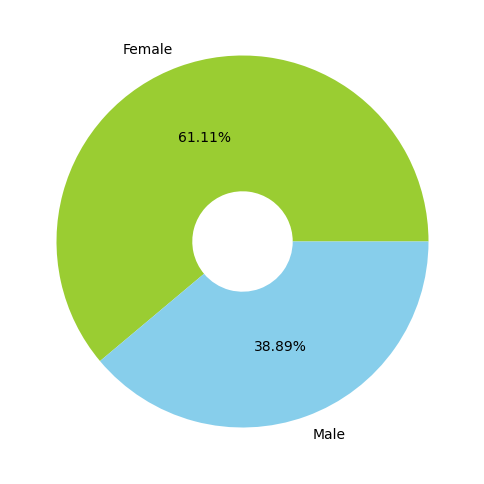

In [15]:
plt.figure(figsize =(6,8))

plt.pie(
    df_gen['total'], 
    labels=df_gen.Gender,
    colors=['yellowgreen','skyblue'], 
    autopct='%0.2f%%', 
    textprops={'color': 'black'},  # Set font color to white
    wedgeprops={'width': 0.73}  # Create the donut effect by setting the width of the wedges
)
plt.show()

In [16]:
emp_status = list(df['Employment'].unique())
student_terms = ["student", "Student", "ကျောင်းသူ", "CDM student", "English Class", "CDM Student", "ကျောင်းနားထားပါတယ်ရှင့်", "Grade 10", "Grade-11", "BEHS Zoke Thoke", "institute", "University", 'Institute', "Federal"]
noedu_terms = ["Not applicable", "Unknown", "No", "Nothing", "-", ".", "မတက်ပါ", "မရှိပါ", "I'm currently at home.",  "haven't joined"]

df[df['Employment'].isin(noedu_terms)]
def text_clean(text):
    if any(term in text for term in student_terms):
        return 'student'
    elif any(term in text for term in noedu_terms):
        return 'edu break'
    else:
        return 'low-level-job'

df['Employ_status'] = df['Employment'].apply(text_clean)
df.head()

,Age,Gender,Location,Education,Employment,Eng_ent,Math_ent,Commitment,Employ_status
0,22,Male,Mandalay,Pass University First Year,student,23.0,26.0,Low,student
1,16,Male,Mandalay,Pass 7th Grade,Not applicable,39.0,38.0,High,edu break
2,19,Female,Sagaing,Pass 10th Grade,English Class တက်နေပြီး Dream Education မှာ Vo...,37.0,36.0,High,student
3,15,Male,Sagaing,Pass 7th Grade,cdm student,32.0,32.0,Low,student
4,16,Female,Yangon,Pass 8th Grade,ကျောင်းသူ,33.0,28.0,High,student


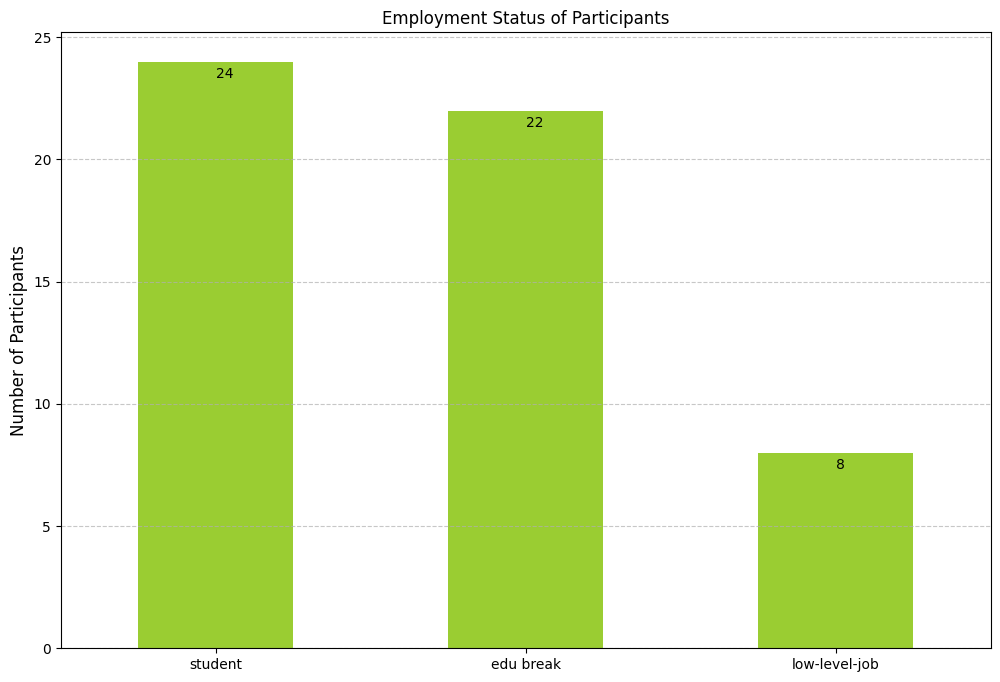

In [17]:
df_community = df['Employ_status'].value_counts()
plt.figure(figsize=(12, 8))
bars = df_community.plot(kind='bar', color='yellowgreen')

for idx, bar in enumerate(bars.patches):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Position text slightly to the right of the bar
        bar.get_height()-0.5,  f'{bar.get_height()}', 
        va='center'  
    )

plt.title('Employment Status of Participants')
plt.xlabel('')
plt.ylabel('Number of Participants', fontsize = 12)
plt.xticks(rotation = 0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
location_counts = pd.read_csv('./data/data_accept_region.csv', index_col = 0)
mean_acceptance_rate = location_counts['Acceptance Rate (%)'].mean()
std_acceptance_rate = location_counts['Acceptance Rate (%)'].std()
underserved_threshold = mean_acceptance_rate - std_acceptance_rate
high_threshold = mean_acceptance_rate + std_acceptance_rate
location_counts

,Location,Total Applicants,Total Accepted,Acceptance Rate (%),labels
0,Ayeyarwady,2,0.0,0.000000,0/2
1,Chin,1,0.0,0.000000,0/1
2,Others,10,0.0,0.000000,0/10
3,Rakhine,1,0.0,0.000000,0/1
4,Bago,6,1.0,16.666667,1/6
5,Taninthary,4,1.0,25.000000,1/4
6,Thailand (Others),4,1.0,25.000000,1/4
7,Kayin,7,2.0,28.571429,2/7
8,Mandalay,22,7.0,31.818182,7/22
9,Shan,8,3.0,37.500000,3/8


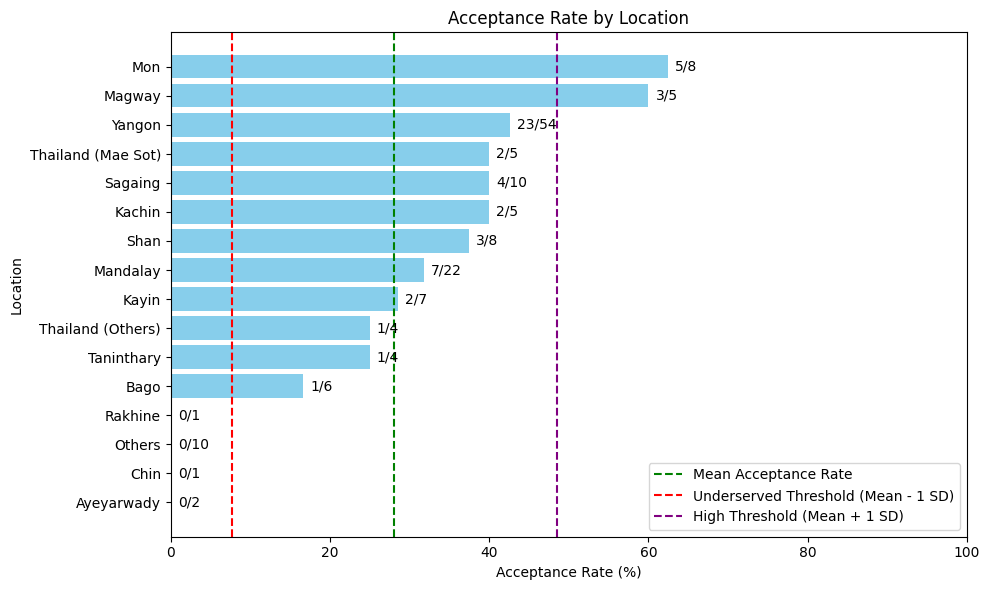

In [19]:
plt.figure(figsize=(10, 6))
bars = plt.barh(location_counts['Location'], location_counts['Acceptance Rate (%)'], color='skyblue')
labels = list(location_counts['labels'])

for idx, bar in enumerate(bars):
    plt.text(
        bar.get_width() + 0.9,  # Position text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Position text in the middle of the bar height
        f'{labels[idx]}', 
        va='center'  # Align text vertically centered
    )


plt.axvline(x=mean_acceptance_rate, color='green', linestyle='--', label='Mean Acceptance Rate')
plt.axvline(x=underserved_threshold, color='red', linestyle='--', label='Underserved Threshold (Mean - 1 SD)')
plt.axvline(x=high_threshold, color='purple', linestyle='--', label='High Threshold (Mean + 1 SD)')
plt.title('Acceptance Rate by Location')
plt.xlabel('Acceptance Rate (%)')
plt.ylabel('Location')
plt.xlim(0, 100)
plt.legend()
plt.tight_layout()


plt.show()

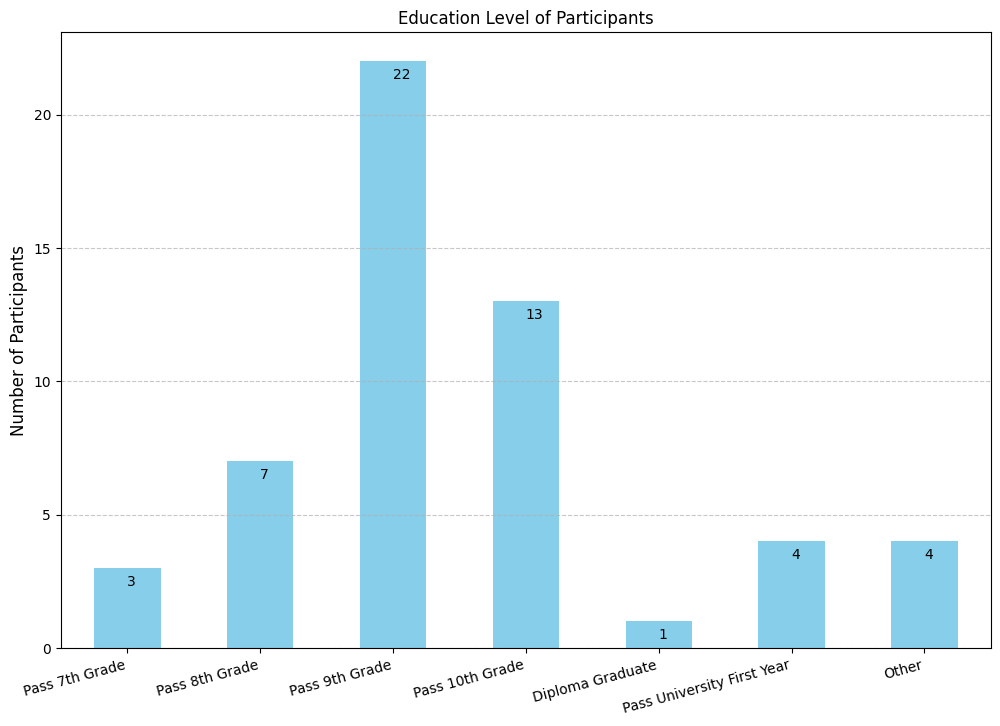

In [20]:
Edu_level_list = ['Pass 7th Grade', 'Pass 8th Grade', 'Pass 9th Grade', 'Pass 10th Grade','Diploma Graduate', 'Pass University First Year', 'Other']
df_edu = df['Education'].value_counts().reindex(Edu_level_list)
plt.figure(figsize=(12, 8))
bars = df_edu.plot(kind='bar', color='skyblue')

for idx, bar in enumerate(bars.patches):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Position text slightly to the right of the bar
        bar.get_height()-0.5,  f'{bar.get_height()}', 
        va='center'  
    )

plt.title('Education Level of Participants')
plt.xlabel('')
plt.ylabel('Number of Participants', fontsize = 12)
plt.xticks(rotation=15, ha='right')  # Rotate the x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Text(0, 0.5, 'Density')

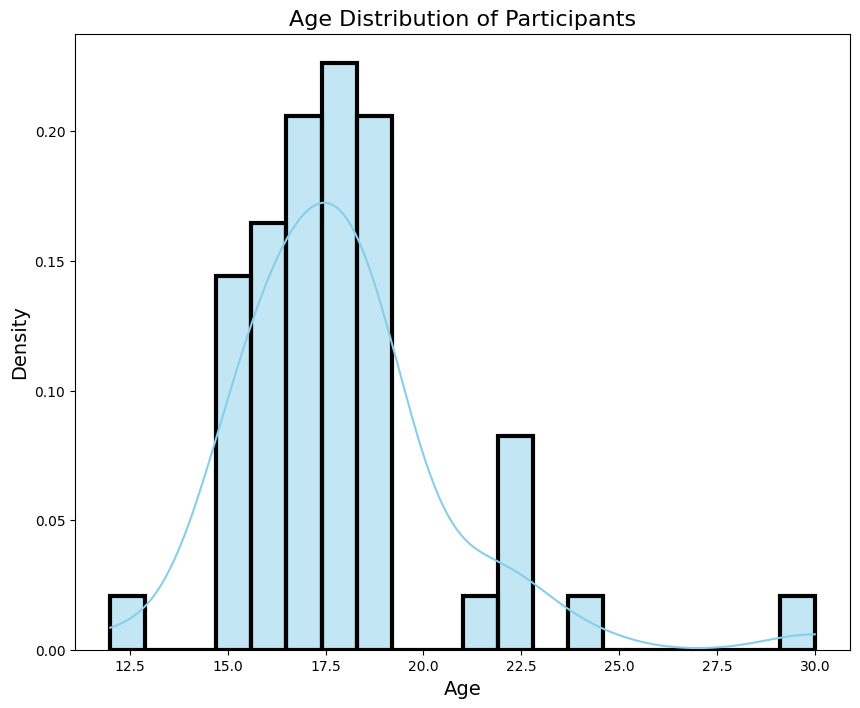

In [21]:
import seaborn as sns

q1 = df['Age'].quantile(0.25)
q2 = df['Age'].mean()
q3 = df['Age'].quantile(0.75)

plt.figure(figsize=(10, 8))
sns.histplot(df['Age'], kde=True, bins = 20, stat = 'density', color='skyblue', linewidth=3)

plt.title('Age Distribution of Participants', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)

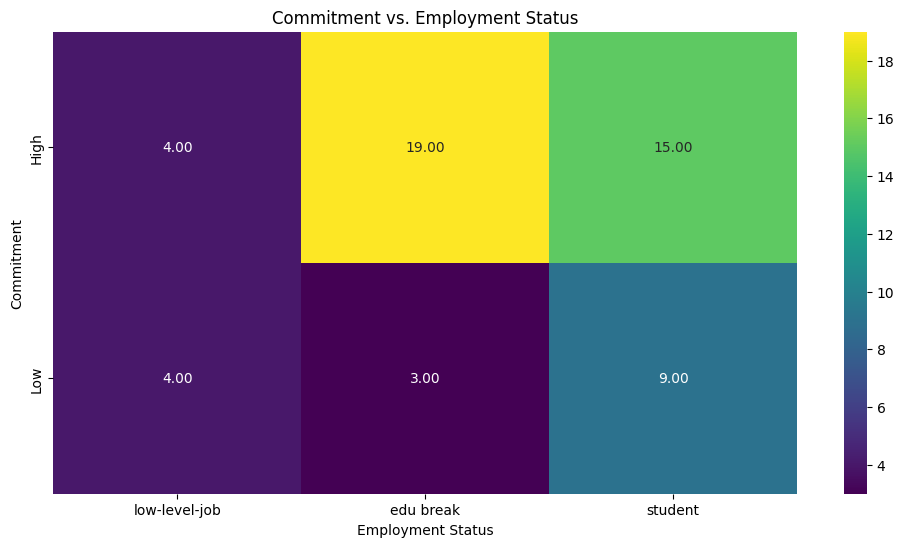

In [22]:
import seaborn as sns
status_list = ['low-level-job', 'edu break', 'student']
df_com_employ = df.groupby(['Commitment', 'Employ_status'], observed = True)['Employ_status'].size().unstack()
df_com_employ = df_com_employ[status_list]


plt.figure(figsize = (12,6))
sns.heatmap(df_com_employ, cmap='viridis', annot=True, fmt='.2f')
plt.title('Commitment vs. Employment Status')
plt.xlabel('Employment Status')
plt.show()


In [23]:
df_com_gender = df.groupby(['Commitment', 'Gender'], observed = True)['Gender'].size().unstack().T
df_com_gender_percentage = df_com_gender.div(df_com_gender.sum(axis=1), axis=0) * 100
df_com_gender

Commitment,High,Low
Gender,,
Female,25,8
Male,13,8


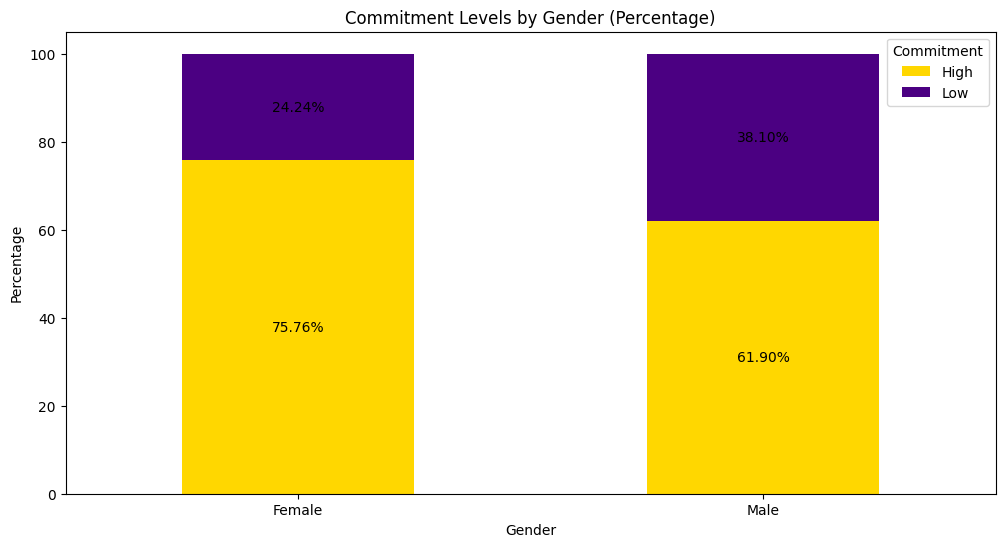

In [24]:
from matplotlib.colors import ListedColormap 

fig, ax = plt.subplots(figsize=(12, 6))
df_com_gender_percentage.plot(kind='bar', stacked=True, color=['#FFD700', '#4B0082'], ax = ax)
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.title('Commitment Levels by Gender (Percentage)')
for i, gender in enumerate(df_com_gender.index):
    cumulative = 0
    for commitment in df_com_gender.columns:
        value = df_com_gender.loc[gender, commitment]          # Actual count for annotation
        percent = df_com_gender_percentage.loc[gender, commitment]  # Percentage height for each segment
        ax.text(i, cumulative + percent / 2, f'{percent:.2f}%', ha='center', va='center', color='black', fontsize=10)
        cumulative += percent  # Update cumulative percentage for next segment

plt.show()

In [25]:
df_region_com = df.groupby(['Commitment', 'Location']).size().unstack().fillna(0).T
df_region_com

df_region_com_per = df_region_com.div(df_region_com.sum(axis=1), axis=0) * 100
df_region_com_per = df_region_com_per.sort_values(by='High', ascending = False)
df_region_com_per


Commitment,High,Low
Location,,
Magway,100.000000,0.000000
Kayin,100.000000,0.000000
Taninthary,100.000000,0.000000
Yangon,86.956522,13.043478
Mon,80.000000,20.000000
Sagaing,75.000000,25.000000
Mandalay,71.428571,28.571429
Kachin,0.000000,100.000000
Bago,0.000000,100.000000


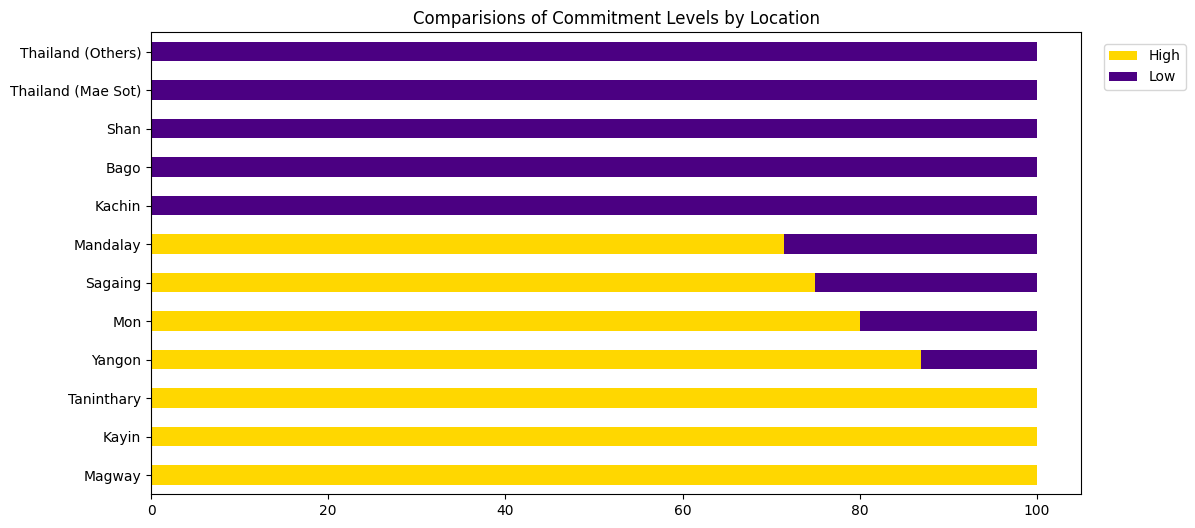

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
df_region_com_per.plot(kind='barh', stacked=True, color=['#FFD700', '#4B0082'], ax = ax)
plt.xticks(rotation=0)
plt.ylabel('')
plt.title('Comparisions of Commitment Levels by Location')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.12,0.99))

plt.show()

In [27]:
df_age_com = df.groupby(['Commitment', 'Age']).size().unstack().fillna(0).T
df_age_com

df_age_com_per = df_age_com.div(df_age_com.sum(axis=1), axis=0) * 100
df_age_com_per = df_age_com_per.sort_index()
df_age_com_per

Commitment,High,Low
Age,,
12,100.000000,0.000000
15,71.428571,28.571429
16,75.000000,25.000000
17,50.000000,50.000000
18,81.818182,18.181818
19,100.000000,0.000000
21,0.000000,100.000000
22,50.000000,50.000000
24,0.000000,100.000000


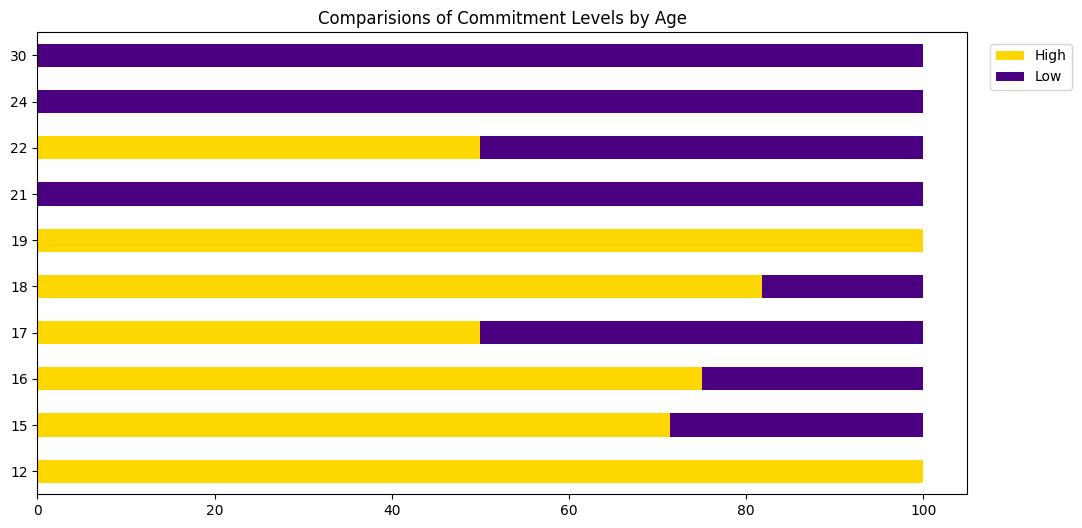

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))
df_age_com_per.plot(kind='barh', stacked=True, color=['#FFD700', '#4B0082'], ax = ax)
plt.xticks(rotation=0)
plt.ylabel('')
plt.title('Comparisions of Commitment Levels by Age')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.12,0.99))

plt.show()

The **Chi-Square test** (also known as the **Chi-Square test of independence**) is a statistical method used to determine whether there is a significant association between two categorical variables. It compares the observed frequencies in a contingency table to the expected frequencies, assuming the variables are independent.

1. **Observed Frequencies (O)**: These are the actual counts you observe in your data for each category or combination of categories.

2. **Expected Frequencies (E)**: These are the counts that you would expect to observe if the two variables were **independent**. 
$$
E_{rc} = \frac{
    \text{Row Total} \times \text{Column Total}}{
    \text{Grand Total}}
$$

3. **Chi-Square Statistic (\(\chi^2\))**: This statistic measures the difference between the observed and expected frequencies. It is calculated using the formula:

   $$
   \chi^2 = \sum \frac{(O - E)^2}{E}
   $$

   Where:
   - **O** is the observed frequency.
   - **E** is the expected frequency.

   The sum is taken over all the cells in the contingency table.

4. **P-Value**: The p-value is used to determine whether the observed difference between the observed and expected frequencies is statistically significant. A **low p-value** (typically below 0.05) suggests that the difference is unlikely to have occurred by chance, indicating a significant association between the two variables.

5. **Degrees of Freedom (df)**: The degrees of freedom for the Chi-Square test is calculated as:

   $$
   \text{df} = (r - 1) \times (c - 1)
   $$

   Where:
   - **r** is the number of rows in the contingency table.
   - **c** is the number of columns in the contingency table.

#### Steps in a Chi-Square Test

1. **Determine Null Hypothesis**: There is no significance relationship between commitment and other feature. 

2. **Compute the Chi-Square Statistic**: Use the formula to calculate the Chi-Square statistic, which quantifies the difference between observed and expected values.

3. **Find the p-value**: Compare the Chi-Square statistic to the Chi-Square distribution (with the appropriate degrees of freedom) to find the p-value.

4. **Interpret the Results**:
   - If the **p-value** is less than the significance level (typically 0.05), reject the null hypothesis, which states that the variables are independent.
   - If the **p-value** is greater than 0.05, fail to reject the null hypothesis, which suggests no significant relationship between the variables. 
   For example: In the **Gender** and **Commitment** test, the **p-value is 0.55**, which is **greater** than `0.05`, so we fail to reject the null hypothesis. This means that we do not have enough evidence to say that that the **Gender** and **Commitment level** are related using this dataset. The likelihood of a person having a High or Low commitment level is not influenced by their gender.

#### Remark

The Chi-Square test is a useful tool for analyzing categorical data. It helps you determine whether two categorical variables are independent or associated with each other. By comparing observed and expected frequencies, you can assess the statistical significance of the relationship between the variables.


In [30]:
import numpy as np
from scipy.stats import chi2_contingency

feature_list = ['Gender', 'Age', 'Employ_status', 'Education']

result = {}
for col in feature_list:
    data = df.groupby(['Commitment', col]).size().unstack().fillna(0).T
    data['Total'] = data.sum(axis=1)
    chi2, p, dof, expected = chi2_contingency(data)
    if col not in result.keys():
        result[col] = (round(chi2,2), round(p,2), round(dof,2), np.round(expected,2))

result_df = pd.DataFrame(result, index=['chi2', 'p', 'dof', 'expected'])
result_df


,Gender,Age,Employ_status,Education
chi2,1.18,15.32,5.0,4.59
p,0.55,0.64,0.29,0.97
dof,2,18,4,12
expected,"[[23.22, 9.78, 33.0], [14.78, 6.22, 21.0]]","[[0.7, 0.3, 1.0], [4.93, 2.07, 7.0], [5.63, 2....","[[15.48, 6.52, 22.0], [5.63, 2.37, 8.0], [16.8...","[[0.7, 0.3, 1.0], [2.81, 1.19, 4.0], [9.15, 3...."
